In [2]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/Users/gagandeepkundi/Downloads/Warsaw_flat_prices_25_Sep_22.csv')

df.head()

In [ ]:
df[['city','district','street_name']] = df['Location'].str.split(",", expand=True).iloc[:,:3]

df.head()

In [ ]:
df[['Price','currency']] = df['Price'].str.rsplit(' ', 1, expand=True)

In [ ]:
df[['Price per m2','currency_m2']] = df['Price per m2'].str.rsplit(' ', 1, expand=True)

In [ ]:
df[['Rooms','word']] = df['Rooms'].str.rsplit(' ', 1, expand=True)

In [ ]:
df[['Size M2','m2']] = df['Size M2'].str.rsplit(' ', 1, expand=True)

In [ ]:
df.head()

In [ ]:
df2 = df.drop(columns=['Location','currency_m2','word','m2'])

In [ ]:
df2.head()

Clean data types

In [ ]:
df2['Price']=df2['Price'].str.replace(' ','')
df2['Price per m2']=df2['Price per m2'].str.replace(' ','')

In [ ]:
df2.head()

In [ ]:
df3 = df2[df2['currency']!='€']

In [ ]:
df3.head()

In [ ]:
df3 = df3.rename(columns={'Price': 'price','Price per m2': 'price_per_m2','Rooms':'rooms','Size M2':'size_m2'})

In [ ]:
df3.head()

In [ ]:
df3 = df3[['city','district','street_name','rooms','size_m2','price_per_m2','price']]

In [ ]:
df3.head()

In [ ]:
df3=df3[df3['rooms']!='10+']

df3['rooms'] = df3['rooms'].astype(int)

In [ ]:
df3['size_m2'] = df3['size_m2'].astype(float)

In [ ]:
df3=df3[df3['price_per_m2']!='$6,097.56/m²']

In [ ]:
df3['price_per_m2'] = df3['price_per_m2'].astype(int)

In [ ]:
#df3=df3[(df3['price']!='7812687,68')&(df3['price']!='5650318,09')]
df3['price'] = df3['price'].str.replace(',','')
df3['price'] = df3['price'].astype(float)

In [ ]:
df3.dtypes

In [ ]:
df3.to_csv('warsaw_apartment_sale.csv')

In [ ]:
df3['district'].value_counts(normalize=True)

In [ ]:
df3.groupby(by='district')['price'].mean()

In [ ]:
df3.sort_values(by='price',ascending=False)

In [ ]:
df_budget = df3[(df3['rooms']>=3)&(df3['price']<700000)]

In [ ]:
df_budget[df_budget['street_name']!=None]

In [4]:
df = pd.read_csv('/Users/gagandeepkundi/Education/machine-learning/3-supervised-learning/2-regression/warsaw_apartment_sale.csv',index_col=0)

df.head()

,city,district,street_name,rooms,size_m2,price_per_m2,price
0,Warszawa,Praga-Północ,NaN,2,29.0,13655,396000.0
1,Warszawa,Bemowo,ul. Secemińska,3,60.1,11564,695000.0
2,Warszawa,Wilanów,NaN,2,55.0,15055,828000.0
3,Warszawa,Białołęka,NaN,3,55.2,13225,730000.0
4,Warszawa,Śródmieście,ul. Marszałkowska 111a,2,38.8,19330,750000.0


/var/folders/mz/z1pq672n1911ycwnmc8w4myw0000gn/T/ipykernel_50743/2380817835.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_m2'],bins=30,color='purple',hist_kws=dict(edgecolor="k", linewidth=2))


Text(0.5, 1.0, 'NORMAL DISTRIBUTION OF PRICES')

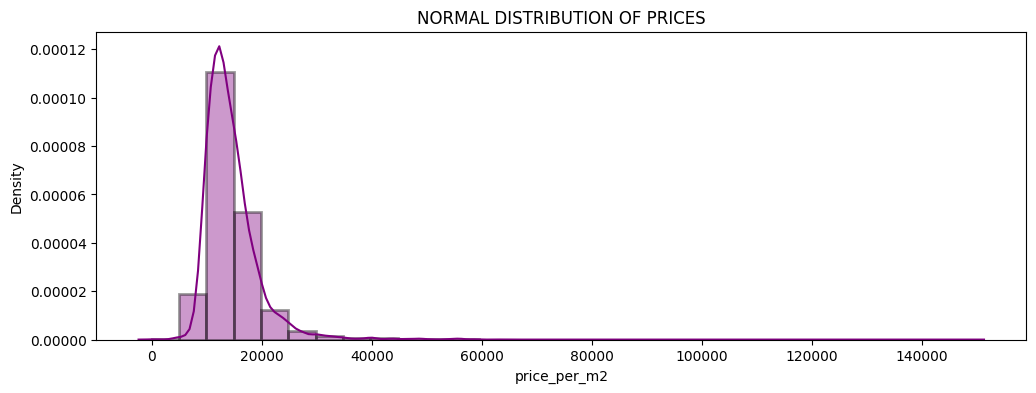

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
sns.distplot(df['price_per_m2'],bins=30,color='purple',hist_kws=dict(edgecolor="k", linewidth=2))
plt.title("NORMAL DISTRIBUTION OF PRICES")

In [9]:
df.groupby(by=['district'])[['size_m2','price_per_m2']].mean().reset_index().sort_values(by='price_per_m2',ascending=False)

,district,size_m2,price_per_m2
22,Śródmieście,70.134682,21410.658908
4,Centrum,64.080800,17555.040000
23,Żoliborz,70.167222,16429.282828
18,Wilanów,80.321290,16024.860215
7,Mokotów,69.276964,15743.406141
19,Wola,55.441119,15661.310169
8,Ochota,58.312677,14560.466321
5,Hirszfelda,42.000000,14262.000000
10,Praga-Północ,50.414730,13600.513514
21,mazowieckie,59.659492,13238.186441


In [12]:
df['price_per_m2'].describe()

count     11230.000000
mean      14452.196527
std        5201.993502
min           1.000000
25%       11384.250000
50%       13399.500000
75%       16173.000000
max      148889.000000
Name: price_per_m2, dtype: float64